In [35]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats, optimize
import os
import pandas as pd
# import atpy
def nice_string_output(d, extra_spacing=5, decimals=3):
    """ 
    Takes a dictionary d consisting of names and values to be properly formatted.
    Makes sure that the distance between the names and the values in the printed
    output has a minimum distance of 'extra_spacing'. One can change the number
    of decimals using the 'decimals' keyword.  
    """
    
    names = d.keys()
    max_names = len_of_longest_string(names)
    
    values = values_to_string(d.values(), decimals=decimals)
    max_values = len_of_longest_string(values)
    
    string = ""
    for name, value in zip(names, values):
        spacing = extra_spacing + max_values + max_names - len(name) - 1 
        string += "{name:s} {value:>{spacing}} \n".format(name=name, value=value, spacing=spacing)
    return string[:-2]

In [11]:
highz_g=np.concatenate((np.ones(int(10e5-10e4)),np.zeros(int(10e4))), axis=0)
lowz_g=np.concatenate((np.zeros(int(10e5-10e4)),np.ones(int(10e4))), axis=0)

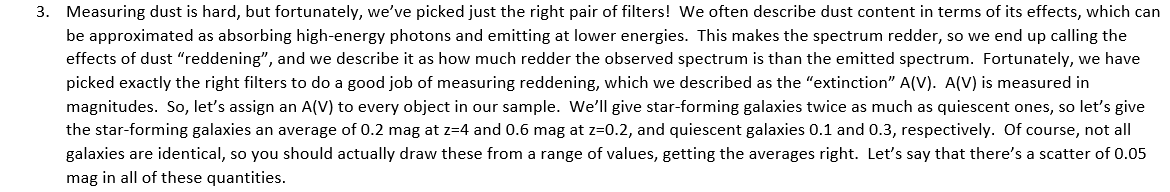

In [16]:
scat=0.05
havs=0.2
havq=0.1
lavs=0.6
lavq=0.3
avhigh=np.concatenate((np.random.uniform(havs-scat,havs+scat,int(10e5-10e4)),np.random.uniform(havq-scat,havq+scat,int(10e5-10e4))), axis=0)
avlow=np.concatenate((np.random.uniform(lavq-scat,lavq+scat,int(10e5-10e4)),np.random.uniform(lavs-scat,lavs+scat,int(10e5-10e4))), axis=0)

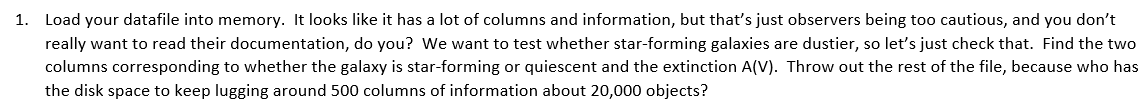

In [31]:
s=np.zeros(int(10e5))
q=np.zeros(int(10e5))
for i in range(int(10e5)):
    if highz_g[i]==1:
        s[i]=avhigh[i]
    if highz_g[i]==0:
        q[i]=avhigh[i]
    if lowz_g[i]==1:
        s[i]=avlow[i]
    if lowz_g[i]==0:
        q[i]=avlow[i]    

In [34]:
np.mean(s), np.mean(q)

(0.24002607158123618, 0.2799881279392648)

In [45]:
dat=pd.read_csv('albert_vals.txt', delimiter=',')

In [48]:
data=np.genfromtxt('albert_vals.txt')

In [53]:
z, t, m, sfr=data[:,0], data[:,1], data[:,2], data[:,3]

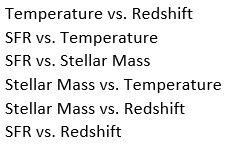

[Text(0, 0.5, 'log SFR'), Text(0.5, 0, 'log M')]

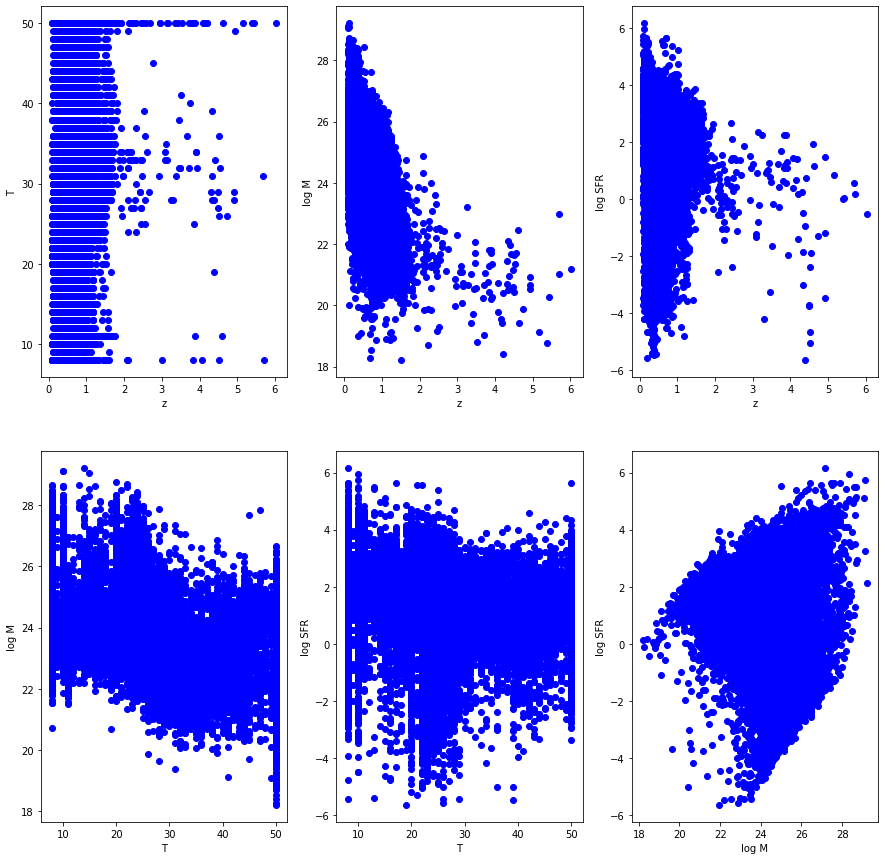

In [74]:
%matplotlib inline
fig, ax=plt.subplots(2,3, figsize=(15,15))
ax=ax.flatten()
ax[0].plot(z, t, 'bo', label=('z,T'))
ax[0].set(xlabel='z', ylabel='T')
ax[1].plot(z, np.log(m), 'bo', label=('z,log M'))
ax[1].set(xlabel='z', ylabel='log M')
ax[2].plot(z, np.log(sfr), 'bo', label=('z,log SFR'))
ax[2].set(xlabel='z', ylabel='log SFR')
ax[3].plot(t, np.log(m), 'bo', label=('T,log M'))
ax[3].set(xlabel='T', ylabel='log M')
ax[4].plot(t, np.log(sfr), 'bo', label=('T,log SFR'))
ax[4].set(xlabel='T', ylabel='log SFR')
ax[5].plot(np.log(m), np.log(sfr), 'bo', label=('log M,log SFR'))
ax[5].set(xlabel='log M', ylabel='log SFR')